<a href="https://colab.research.google.com/github/andresanchetta/Aulas_Udemy/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
# Importando os dados e verificando o tamanho do DF:
url = 'https://raw.githubusercontent.com/andresanchetta/Aulas_Udemy/main/Dados/Credit.csv'
credito = pd.read_csv(url, sep = ',')
credito.shape

(1000, 21)

In [3]:
# Explorando o DF:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


O DF é um conjunto de dados de clientes de banco, o qual solicitaram crédito, e a classe, a variavel que tentaremos prever com o modelo, indica se são bons ou mal pagadores.

In [4]:
# Definição dos previsores (variáveis independentes - X) e a classe (variável dependente - y), transformando em matriz:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

Para seguir com a análise, é preciso transformar os atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica.
É precisamos criar um objeto para cada atributo categórico, pois na sequência é executado o processo de encoding novamente para o registro de teste, através do label encoder.
Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente.

In [5]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])
previsores[:, 5] = labelencoder.fit_transform(previsores[:, 5])
previsores[:, 6] = labelencoder.fit_transform(previsores[:, 6])
previsores[:, 8] = labelencoder.fit_transform(previsores[:, 8])
previsores[:, 9] = labelencoder.fit_transform(previsores[:, 9])
previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [6]:
# Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [18]:
# Criação do modelo e treinamento:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# Visualização dos atributos principais
# floresta.estimators_
floresta.estimators_[1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=45162779, splitter='best')

In [20]:
# Previsões e Taxa de Acerto
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.78

O modelo de Random Forest obteve uma acurácia de apróximadamente 80%.

Alterando a quantidade de estimadores para visualizar a diferença entre os resultados.

In [33]:
resultados = [0,0,0]

for i in range(1,1000):
  floresta = RandomForestClassifier(n_estimators = i)
  floresta.fit(X_treinamento, y_treinamento)
  previsoes = floresta.predict(X_teste)
  confusao = confusion_matrix(y_teste, previsoes)
  resultados.append(accuracy_score(y_teste, previsoes))
  

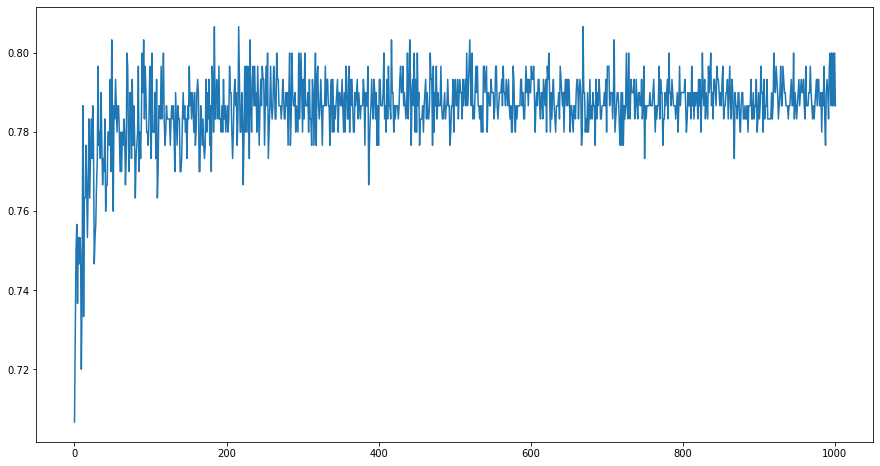

In [57]:
# Plotando os resultados para ter uma noção de como o número de estimadores influencia no resultado:
plt.figure(figsize=(15,8))
plt.plot(resultados)

In [66]:
#Descobrindo a maior acertividade e o numero de estimadores utilizado:
n_max = max(resultados)
n_pos = resultados.index(n_max) # Pega a posição do valor n_max, lembrando que iniciamos em 1, portanto somamos 1 ao resultado da posição.

print ('Maior Acertividade: ',n_max,'%.')
print ('Numero de Interações: ',n_pos+1,'.')

Maior Acertividade:  0.8066666666666666 %.
Numero de Interações:  185 .
